## This notebook can be used to rank a list of nodes from a category that connect to an entity such as a gene. 

In [2]:
from TCT import node_normalizer
from TCT import name_resolver
from TCT import translator_metakg
from TCT import translator_kpinfo
from TCT import translator_query
from TCT import TCT


### Load Translator resources


In [5]:
APInames, metaKG, Translator_KP_info= translator_metakg.load_translator_resources()

In [11]:
All_predicates = list(set(metaKG['Predicate']))
All_categories = list((set(list(set(metaKG['Subject']))+list(set(metaKG['Object'])))))
API_withMetaKG = list(set(metaKG['API']))

    # generate a dictionary of API and its predicates
API_predicates = {}
for api in API_withMetaKG:
    API_predicates[api] = list(set(metaKG[metaKG['API'] == api]['Predicate']))

## Find the neiborhood of an entity from a subset of APIs 


In [13]:
# select a list of APIs to use and a list of predicates to use
selected_APIlist = []

if len(selected_APIlist) == 0:
    select_APIs = APInames
else:
    select_APIs = {k: APInames[k] for k in selected_APIlist if k in APInames}

selected_metaKG = metaKG[metaKG['API'].isin(select_APIs.keys())]
print(select_APIs)
print(selected_metaKG.shape)


{'COHD TRAPI': 'https://cohd-api.transltr.io/api/query/', 'Genetics Data Provider for NCATS Biomedical Translator Reasoners': 'https://genetics-kp.transltr.io/genetics_provider/trapi/v1.5/query/', 'Drug Approvals KP - TRAPI 1.5.0': 'https://multiomics.rtx.ai:9990/dakp/query', 'Cqs(Trapi v1.5.0)': 'https://cqs.ci.transltr.io/query/', 'BioThings Explorer (BTE) TRAPI': 'https://bte.transltr.io/v1/query/', 'Aragorn(Trapi v1.6.0)': 'https://aragorn.renci.org/aragorn/query/', 'CATRAX Pharmacogenomics KP - TRAPI 1.5.0': 'https://multiomics.rtx.ai:9990/PharmacogenomicsKG/query', 'mediKanren': 'https://medikanren-trapi.transltr.io/query/', 'CATRAX BigGIM DrugResponse Performance Phase KP - TRAPI 1.5.0': 'https://multiomics.rtx.ai:9990/BigGIM_DrugResponse_PerformancePhase/query', 'Text Mined Cooccurrence API': 'https://cooccurrence.ci.transltr.io/query/', 'Connections Hypothesis Provider API': 'https://chp-api.transltr.io/query/', 'RTX KG2 - TRAPI 1.5.0': 'https://kg2cploverdb.ci.transltr.io/kg2

In [32]:
input_node_id, result, result_parsed, result_ranked_by_primary_infores = Neiborhood_finder('AML',
                                                                                            node2_categories = ['biolink:SmallMolecule', 'biolink:Drug', 'biolink:ChemicalEntity'],
                                                                                            APInames = select_APIs,
                                                                                            metaKG = selected_metaKG,
                                                                                            API_predicates = API_predicates)     

MONDO:0018874
Automat-monarchinitiative(Trapi v1.5.0): Success!Automat-hetionet(Trapi v1.5.0): Success!

Automat-ctd(Trapi v1.5.0): Success!
Drug Approvals KP - TRAPI 1.5.0: Success!
Automat-drug-central(Trapi v1.5.0): Success!
RTX KG2 - TRAPI 1.5.0: Success!
Clinical Trials KP - TRAPI 1.5.0: Success!
Automat-robokop(Trapi v1.5.0): Success!
BioThings Explorer (BTE) TRAPI: Success!
NodeNorm does not know about these identifiers: DRUGBANK:DB15060,REACT:R-ALL-9692345,DRUGBANK:DB19304,UMLS:C5907983,UMLS:C5908001,DRUGBANK:DB19070,GTOPDB:13607,UMLS:C5907931,DRUGBANK:DB18753,UMLS:C5908989,CHEMBL.COMPOUND:CHEMBL5483015,UMLS:C5888788,UMLS:C5907992,CHEBI:232584,DRUGBANK:DB18980,CHEBI:232616,CHEBI:232328,UNII:ET4JC4S66E,UNII:Y8DGL9885E,UNII:3D2KVS9K7P,UNII:OEN4982XNW,UNII:PVH8394DLN,UNII:FR89SC8CT4,UNII:Q805XO2F7C,UNII:E6349B696W,UNII:VS12X225PL,UNII:IZR558KO53,UNII:475247QF1Z,UNII:L4D9X59F34,UNII:O5V0F26RUW,UNII:RXG7T6RB8K,RXCUI:1791496,RXCUI:1736582,RXCUI:1722942,UMLS:DC0003818,UMLS:DC0012155,U

NodeNorm does not know about these identifiers: UNII:ET4JC4S66E,UNII:Y8DGL9885E,UNII:O5V0F26RUW,UNII:E6349B696W,UNII:FR89SC8CT4,UNII:PVH8394DLN,UMLS:DC0003818,UMLS:DC0012155,UNII:IZR558KO53,UNII:7EV65EAW6H,MESH:D000596,MESH:C059764,UNII:L4D9X59F34,UNII:475247QF1Z,UMLS:DC0041411,UNII:RXG7T6RB8K,UMLS:DC0037549,RXCUI:1722942,RXCUI:1736582,RXCUI:1791496,UMLS:C0596087,UMLS:C0002073,UMLS:C0597573,UMLS:C0062128,RXCUI:1658260,RXCUI:1666799,RXCUI:1729198,RXCUI:1360104,RXCUI:1719287,RXCUI:900963,RXCUI:1795608,RXCUI:1860464,RXCUI:379454,RXCUI:1362058,RXCUI:1860240,RXCUI:1807509,RXCUI:1665191,RXCUI:1362049,RXCUI:1656667,RXCUI:1362054,RXCUI:1723777,MESH:C081693,RXCUI:1662281,RXCUI:1433769,RXCUI:1795154,UMLS:C5908001,DRUGBANK:DB19070,UMLS:C5907983,CHEMBL.COMPOUND:CHEMBL5483015,UMLS:C5908989,GTOPDB:13607,DRUGBANK:DB18753,UMLS:C5907931,DRUGBANK:DB15060,REACT:R-ALL-9692345,DRUGBANK:DB19304,UNII:VS12X225PL,UNII:Q805XO2F7C,UNII:OEN4982XNW,UNII:3D2KVS9K7P,UMLS:C5888788,CHEBI:232328,CHEBI:232584,UMLS:C5907

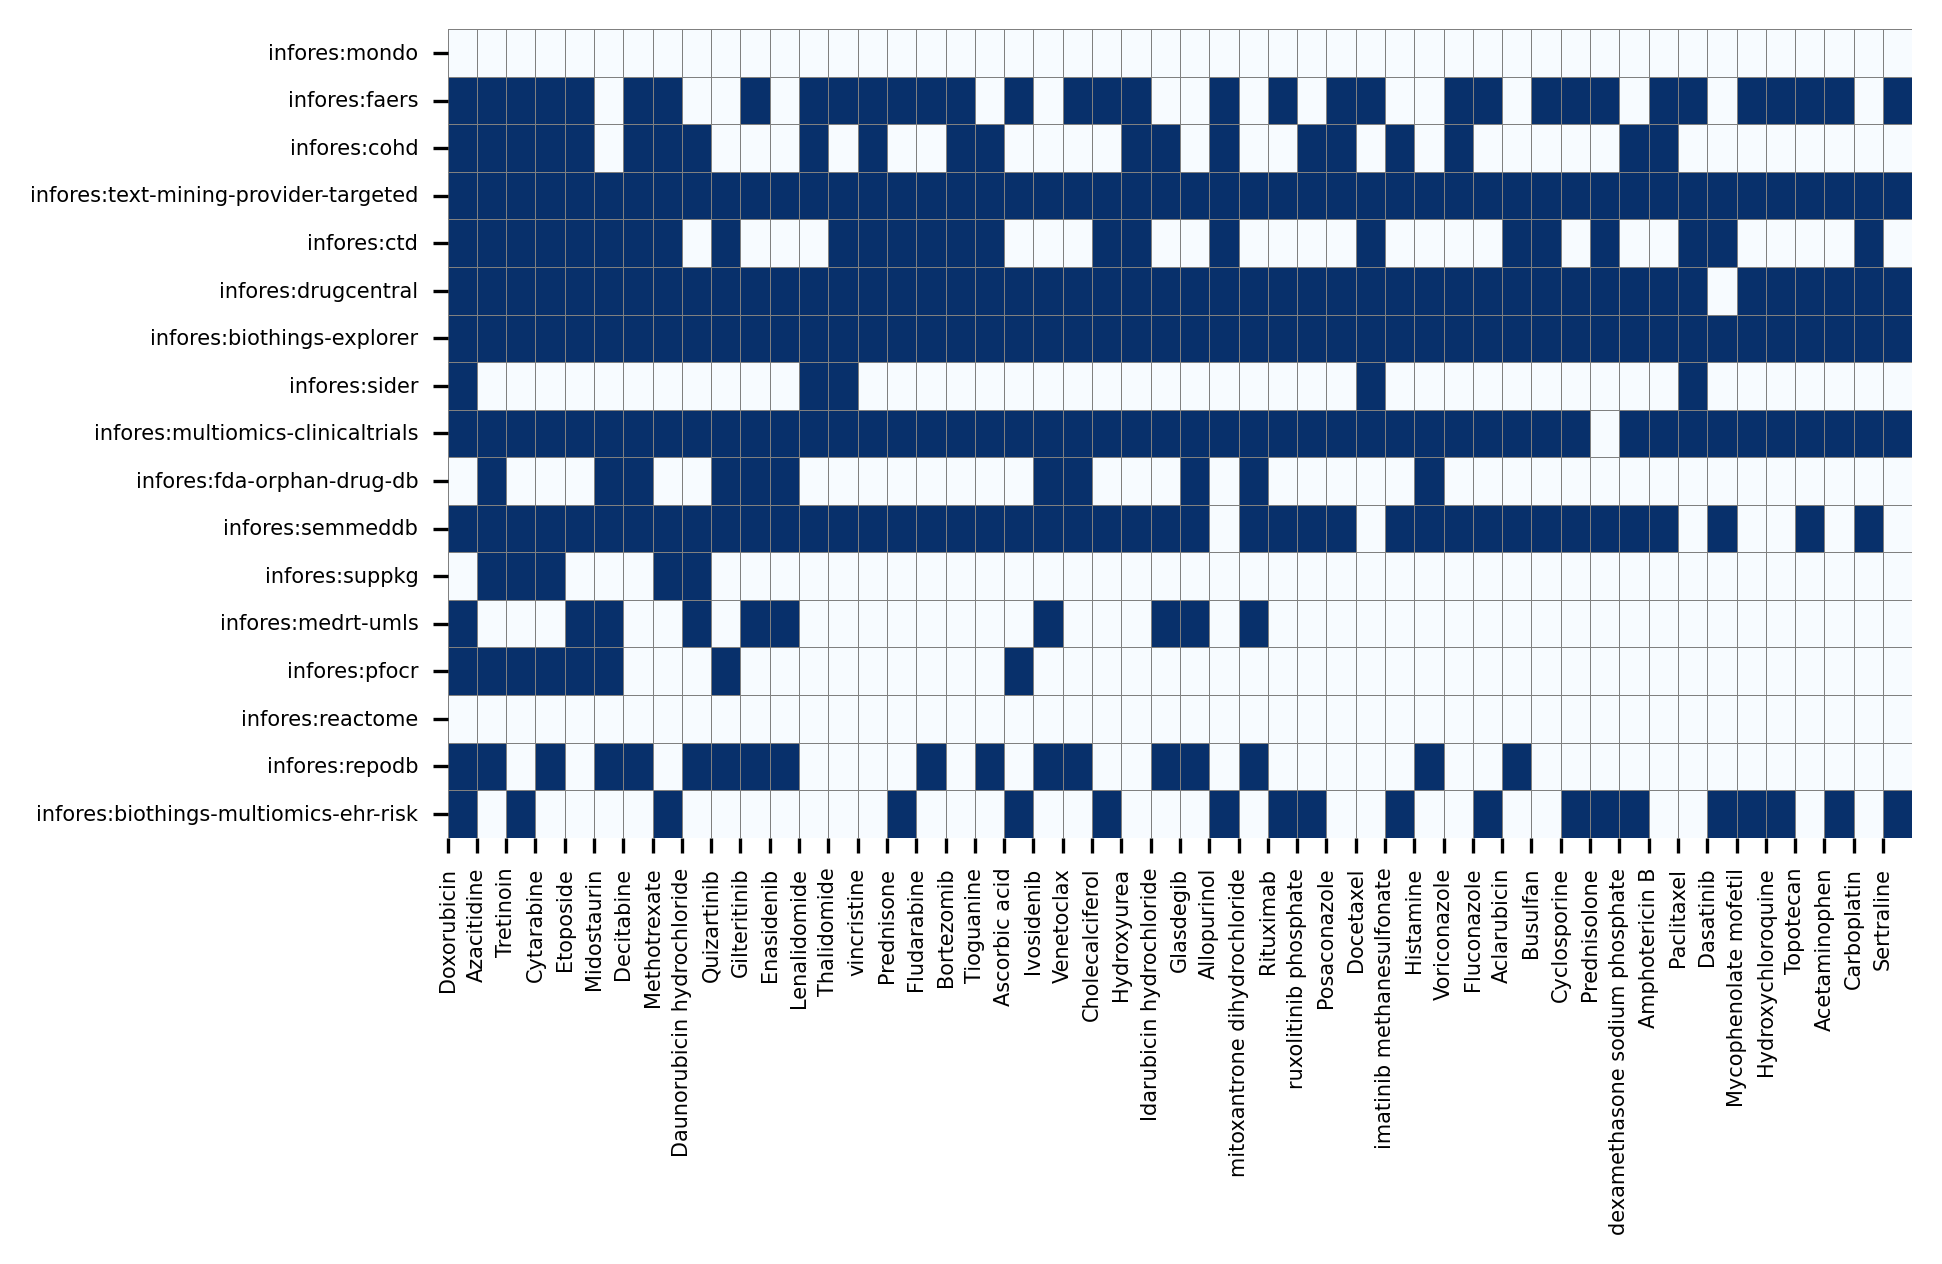

[Text(0.5, 0, 'Doxorubicin'), Text(2.5, 0, 'Tretinoin'), Text(4.5, 0, 'Etoposide'), Text(6.5, 0, 'Decitabine'), Text(8.5, 0, 'Daunorubicin hydrochloride'), Text(10.5, 0, 'Gilteritinib'), Text(12.5, 0, 'Lenalidomide'), Text(14.5, 0, 'vincristine'), Text(16.5, 0, 'Fludarabine'), Text(18.5, 0, 'Tioguanine'), Text(20.5, 0, 'Ivosidenib'), Text(22.5, 0, 'Cholecalciferol'), Text(24.5, 0, 'Idarubicin hydrochloride'), Text(26.5, 0, 'Allopurinol'), Text(28.5, 0, 'Rituximab'), Text(30.5, 0, 'Posaconazole'), Text(32.5, 0, 'imatinib methanesulfonate'), Text(34.5, 0, 'Voriconazole'), Text(36.5, 0, 'Aclarubicin'), Text(38.5, 0, 'Cyclosporine'), Text(40.5, 0, 'dexamethasone sodium phosphate'), Text(42.5, 0, 'Paclitaxel'), Text(44.5, 0, 'Mycophenolate mofetil'), Text(46.5, 0, 'Topotecan'), Text(48.5, 0, 'Carboplatin')]


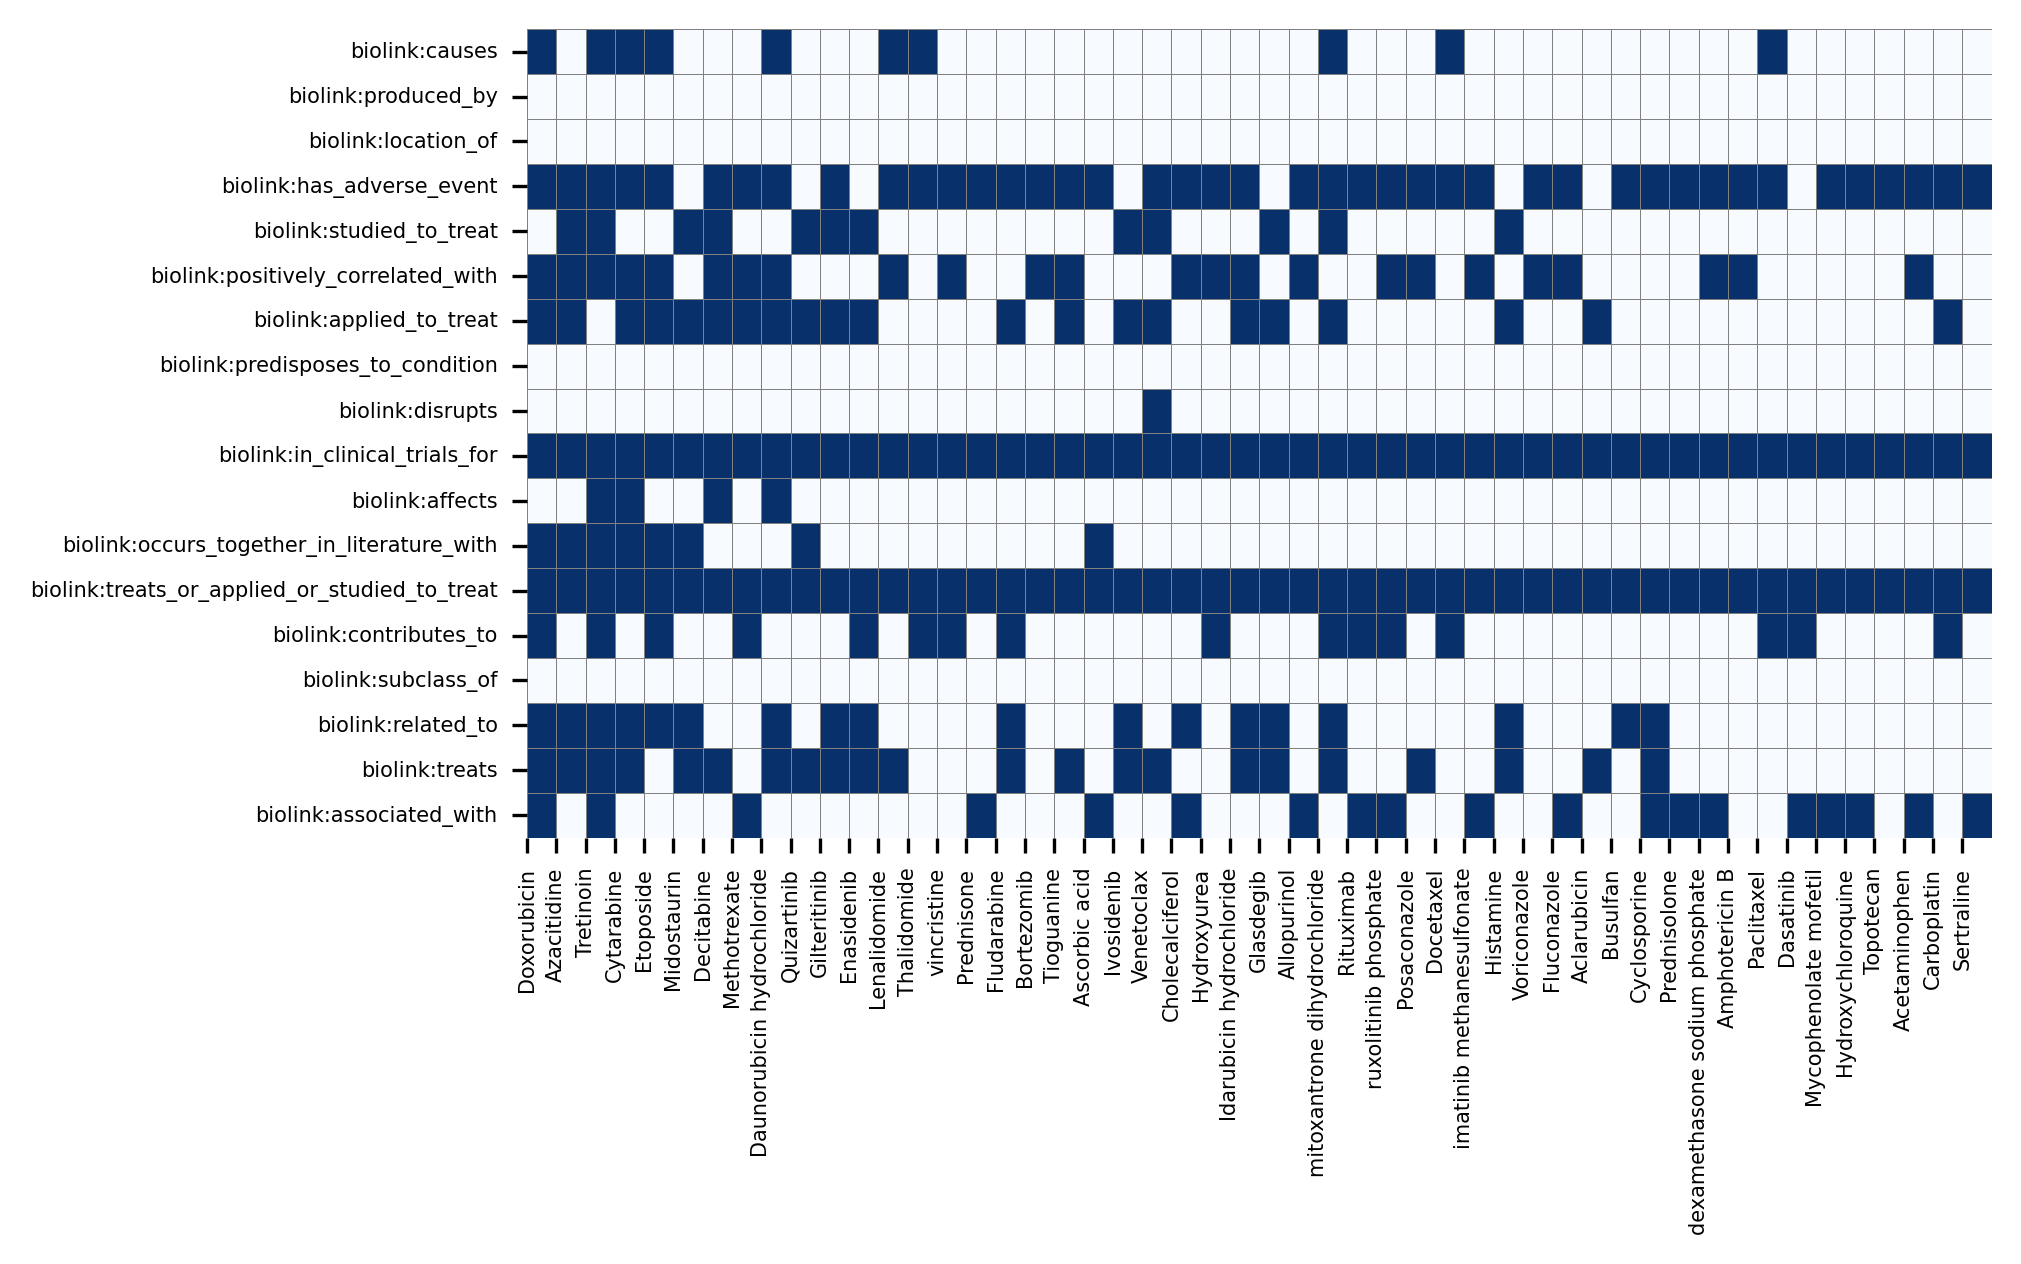

Doxorubicin  Azacitidine  \
biolink:causes                                           1            0   
biolink:produced_by                                      0            0   
biolink:location_of                                      0            0   
biolink:has_adverse_event                                1            1   
biolink:studied_to_treat                                 0            1   
biolink:positively_correlated_with                       1            1   
biolink:applied_to_treat                                 1            1   
biolink:predisposes_to_condition                         0            0   
biolink:disrupts                                         0            0   
biolink:in_clinical_trials_for                           1            1   
biolink:affects                                          0            0   
biolink:occurs_together_in_literature_with               1            1   
biolink:treats_or_applied_or_studied_to_treat            1            1   
biolink:contributes_to                                   1            0   
biolink:subclass_of                                      0            0   
biolink:related_to                                       1            1   
biolink:treats                                           1            1   
biolink:associated_with                                  1            0   

                                               Tretinoin  Cytarabine  \
biolink:causes                                         1           1   
biolink:produced_by                                    0           0   
biolink:location_of                                    0           0   
biolink:has_adverse_event                              1           1   
biolink:studied_to_treat                               1           0   
biolink:positively_correlated_with                     1           1   
biolink:applied_to_treat                               0           1   
biolink:predisposes_to_condition                       0           0   
biolink:disrupts                                       0           0   
biolink:in_clinical_trials_for                         1           1   
biolink:affects                                        1           1   
biolink:occurs_together_in_literature_with             1           1   
biolink:treats_or_applied_or_studied_to_treat          1           1   
biolink:contributes_to                                 1           0   
biolink:subclass_of                                    0           0   
biolink:related_to                                     1           1   
biolink:treats                                         1           1   
biolink:associated_with                                1           0   

                                               Etoposide  Midostaurin  \
biolink:causes                                         1            0   
biolink:produced_by                                    0            0   
biolink:location_of                                    0            0   
biolink:has_adverse_event                              1            0   
biolink:studied_to_treat                               0            1   
biolink:positively_correlated_with                     1            0   
biolink:applied_to_treat                               1            1   
biolink:predisposes_to_condition                       0            0   
biolink:disrupts                                       0            0   
biolink:in_clinical_trials_for                         1            1   
biolink:affects                                        0            0   
biolink:occurs_together_in_literature_with             1            1   
biolink:treats_or_applied_or_studied_to_treat          1            1   
biolink:contributes_to                                 1            0   
biolink:subclass_of                                    0            0   
biolink:related_to                                     1            1   
biolink:tre

In [33]:
# Step 8: Visualize the results
TCT.visulization_one_hop_ranking(result_ranked_by_primary_infores, result_parsed, 
                                num_of_nodes = 50, input_query = input_node_id, 
                                fontsize = 5)

In [34]:
result_ranked_by_primary_infores

output_node          Name  Num_of_primary_infores  \
21                  CHEBI:28748   Doxorubicin                      13   
29                   CHEBI:2038   Azacitidine                      12   
256                 CHEBI:15367     Tretinoin                      11   
23                  CHEBI:28680    Cytarabine                      11   
20                   CHEBI:4911     Etoposide                      10   
...                         ...           ...                     ...   
1086  PUBCHEM.COMPOUND:24950485    Cobicistat                       1   
1085            MESH:C000620859   Mivavotinib                       1   
1084               CHEBI:230493  pinometostat                       1   
1083   PUBCHEM.COMPOUND:9916099    Letermovir                       1   
2905            UNII:0C1JUU9S0L        LB-100                       1   

     type_of_nodes                                  unique_predicates  
21         subject  [biolink:treats_or_applied_or_studied_to_treat...  
29         subject  [biolink:treats_or_applied_or_studied_to_treat...  
256        subject  [biolink:affects, biolink:related_to, biolink:...  
23         subject  [biolink:treats_or_applied_or_studied_to_treat...  
20         subject  [biolink:treats_or_applied_or_studied_to_treat...  
...            ...                                                ...  
1086       subject                   [biolink:in_clinical_trials_for]  
1085       subject                   [biolink:in_clinical_trials_for]  
1084       subject                   [biolink:in_clinical_trials_for]  
1083       subject                   [biolink:in_clinical_trials_for]  
2905       subject    [biolink:treats_or_applied_or_studied_to_treat]  

[2906 rows x 5 columns]

In [30]:
# End of the example
